# 4장 모델 훈련

* 모델 훈련 작동과정 이해
    * 디버깅, 에러 분석 등에 도움
* 딥러닝의 신경망 이해, 구축, 훈련에 필요한 주제 포함

## 개요

* 선형 회귀 모델
    * 수학적으로 모델 파라미터 구하기
    * 경사하강법 적용 모델 훈련

* 경사하강법 종류
    * 배치 경사하강법
    * 미니배치 경사하강법
    * 확률적 경사하강법(SGD)

* 다항 회귀
    * 비선형 모델 훈련법
    
* 학습 곡선
    * 과대적합 감지
    
* 규제 기법
    * 과대적합 위험 감소
    
* 로지스틱 회귀와 소프트맥스 회귀
    * 분류 모델

## 목차

1. 선형 회귀
2. 경사하강법
3. 다항 회귀
4. 학습 곡선
5. 규제가 있는 선형 모델
6. 로지스틱 회귀와 소프트맥스 회귀

## 4.1 선형 회귀

- 한 개의 특성 $x_1$을 사용하는 $i$번째 훈련 샘플에 대한 예측값을 구하는 선형 회귀 모델은 아래와 같음

$$\hat y^{(i)} = \theta_0 + \theta_1\, x_1^{(i)}$$


- $n\ge 1$ 개의 특성을 사용하는 $i$번째 훈련 샘플에 대한 예측값을 구하는 일반적인 선형 회귀 모델은 아래와 같음

$$\hat y^{(i)} = \theta_0 + \theta_1\, x_1^{(i)} + \cdots + \theta_n\, x_n^{(i)}$$


- 사용된 기호들의 의미
  * $\hat y^{(i)}$: $i$ 번째 훈련 샘플에 대한 **예측값**(타깃)
  * $n$: 특성 **개수**
  * $x_k^{(i)}$: $i$ 번째 훈련 샘플의 $k$ 번째 **특성값**
  * $\theta_i$
    * $i > 0$: $i$ 번째 특성에 대한 **가중치** 파라미터
    * $\theta_0$: **편향**을 의미함.

## 1.1 **정규 방정식**
---
- 선형 모델의 비용 함수를 최소화하는 $\theta$를 수학적으로 해결이 가능
- 선형회귀의 경우 아래 방정식이 만족되면 평균 제곱 오차(**MSE**)**가 0**이 되면서 최솟값을 가짐

$$\theta^{T}\, {\mathbf X}_b^T - {\mathbf y}^T = 0$$

- **정규방정식**: 위 방정식을 만족시키는 **가중치들의 리스트** $\hat\theta$를 찾는데 활용되는 아래의 방정식을 의미

$$\hat\theta = (\mathbf{X}_b^T \mathbf{X}_b)^{-1} \mathbf{X}_b^T \mathbf{y}$$


#### **사이키런의 선형 회귀**
* 사이킷런의**` LinearRegression 클래스`**가 선형 회귀 모델의 **근사치**를 계산

* **`LinearRegression.fit()`** 메서드는 정규방정식을 이용 X
  * 행렬 계산 비용이 매우 비싸기 때문

* **`LinearRegression.fit()`** 메서드는 **특잇값 분해**(singular value decomposition, SVD)라는 **표준 행렬 분해** 기법을 사용하여 아래 성질을 만족하는 행렬 $\mathbf X^+$를 계산

$$\hat\theta \cong \mathbf X^+ \, \mathbf y$$

* $\mathbf X^+$: $\mathbf X$의 **유사역행렬**(pseudoinverse)

## 1.2 **계산 복잡도**
---
- 정규방정식에 사용되는 $(n+1)\times (n+1)$ 모양의 $\mathbf{X}_b^T \mathbf{X}_b$의 **역행렬을 계산**해야함
- 역행렬 계산 복잡도는 $O(n^{2.4}) \sim O(n^3)$ 정도로 **비용이 많이 듦**
-  즉, 특성 수가 두 배로 늘면 계산 시간은 $2^{2.4}=5.3 \sim 2^3 = 8$ 배 정도 증가

- 반면에 `LinearRegression` 에서 사용하는 **SVD 방식**의 시간 복잡도는 $O(n^2)$으로 상대적으로 저렴
  * 하지만 그래도 **특성 수가 크면 실용성이 떨어짐**

- 특성 수가 매우 많거나 훈련 세트의 크기가 너무 큰 경우 하나의 행렬로 지정한 후 매우 큰 수의 계산 과정을 실행하는 것은 **시간 뿐만 아니라 메모리 관련 문제**도 발생

- 따라서 이럴 때는 정규방정식 방법 대신에 **경사 하강법**을 사용

**!주의!**
* 이미 선형 모델 학습이 되었다면 **예측**을 위한 시간 복잡도는 $O(n)$, 즉, **특성 수에 선형적**

# 2. 경사 하강법

- 경사 하강법(gradient descent, GD)의 기본 아이디어는 훈련 세트를 이용한 학습 과정을 통해 가중치 등의 **파라미터를 조금씩 조정해 가는 것**

## 2.1 경사 하강법에 사용되는 **주요 개념** 
--- 
1. **최적 학습 모델**
  * 경사 하강법의 목표는 최적의 학습 모델을 점진적으로 찾아가는 것

2. **파라미터**
  * 최적의 학습 모델을 찾으려면 학습 모델을 결정하는 최적의 파라미터를 찾아야 함
  * **선형** 회귀 모델의 경우, 파라미터는 **편형과 가중치**를 의미
    * 편향($\theta_0$)과 가중치($\theta_i$)가 결정되면 선형 회귀 모델이 결정되기 때문

  $$\hat {\mathbf y}^T = h_\theta (\mathbf X) = \theta^{T}\, \mathbf X_b^T$$

3. **비용 함수**
  * 최적의 학습 모델은 **비용 함수가 최소**가 되도록 하는 모델
  * **선형** 회귀 모델의 경우 평균 제곱 오차(**MSE**)가 비용 함수이며, 파라미터 $\theta_i$에 의존

$$
\mathrm{MSE}(\mathbf X, h_\theta) = 
\frac 1 m \sum_{i=0}^{m-1} (\theta^{T}\, \mathbf (\mathbf x_b^{(i)})^T - y^{(i)})^2
$$

4. **전역 최솟값**
  * **비용 함수가 갖는 최소값**을 전역 최솟값이라 하며, 전역 최솟값이 되도록 하는 파라미터를 찾아야 함
  * **선형** 회귀 모델의 경우 평균 제곱 오차(**MSE**) 함수가 **최소**가 되도록 하는 파라미터 $\theta_i$를 찾아야 함

5. **그레이디언트 벡터**
  * 그레이디언트(gradient) 벡터는 **다변수 함수의 미분값**을 의미
  * 다변수 함수의 미분값은 하나의 값이 아닌 **여러 개의 값**으로 이루어진 벡터를 이룸
  * **선형** 회귀의 경우 **$n+1$개의 파라미터($\theta_i$)**가 평균 제곱 오차(MSE) 함수의 매개변수로 사용
  * **다변수 함수**: 두 개 이상의 매개변수를 사용하는 함수
"
  * 다변수 함수의 미분값은 **편미분**을 이용
    * 비용 함수의 **전역 최솟값**은 **그레이디언트가 0 벡터**가 되도록 하는 지점에서 비용 함수가 갖는 값
    * 선형 회귀의 경우 $\nabla_\theta \textrm{MSE}(\theta)=0$이 되게하는 파라미터 $\theta$를 찾아야 함
    * 행렬의 곱셈은 비용이 많이 드므로 **임의의 파라미터($\theta$)로 시작**해서 최적의 $\theta$를 찾아가는 방식을 사용
  
  * $\nabla_\theta \textrm{MSE}(\theta)$에 담긴 내용
    * 지점 $\theta$에서의 편미분 값들로 이루어진 벡터
    * 벡터는 **방향과 크기**에 대한 정보를 갖고 있음
    * 비용 함수의 **전역 최솟값**은 그레이디언트가 가리키는 방향의 **반대쪽**으로 움직여야 가장 빠르게 접근할 수 있음

6. **학습률**
  * 비용 함수의 파라미터를 임의의 값으로 지정한 후 학습과정에서 **반복적으로 그레이디언트를 계산**하여 계산 결과에 따라 **파라미터 값을 조정**해야 하며, 이 조정 과정을 **비용 함수가 특정 값에 수렴할 때**까지 반복
  * 파라미터를 조정할 때마다 조정되는 값의 **크기를 제한**해야함
    * 너무 **크게** 움직이면 비용 함수가 **수렴 X**
    * 너무 **작게** 움직이면 비용 함수가 전역 최소값에 너무 **느리게 수렴**하거나, 아니면 전역 최솟값이 아닌 **지역 최솟값에 수렴**할 수도 있음
      * **지역 최솟값**: 특정 영역 내에서 최솟값
  * 파라미터 조정의 크기를 정하는 값이 **학습률**(learning rate)이며, 보통 그리스어 알파벳인 $\eta$(에타)로 표기
  * 파라미터 조정은 해당 지점의 **그레이디언트 벡터가 가리키는 반대 방향**으로 움직여야함
    * 예를 들어, 선형 회귀의 경우 새로운 파라미터 $\theta^{(\text{next step})}$을 학습률을 이용하여 아래와 같이 계산
    * 즉, **그레이디어트 벡터가 가리키는 반대 방향으로 학습률이 지정하는 만큼 파라미터를 조정**
$$\theta^{(\text{new})} = \theta^{(\text{old})}\, -\, \eta\cdot \nabla_\theta \textrm{MSE}(\theta^{(\text{old})})$$

  * 선형 회귀의 경우 학습률이 너무 크지만 않으면 언젠가는 전역 최솟값에 수렴한다는 것이 보장되지만 학습률이 너무 크면 수렴하지 않고 무한으로 발산할 수 있음
음
    * 비용함수가 항상 **볼록 함수**이기 때문
    * 볼록 함수는 지역 최솟값을 갖지 않음


7. **하이퍼파라미터**
* **하이퍼파라미터**(hyperparameter): 모델 학습 과정에서 변하는 값이 아니라 학습 **시작 전에 지정**되어야 하는 값
* 대표적인 하이퍼파라미터는 전체 훈련 세트를 몇 번 학습할지를 결정하는 **반복횟수**이며, **에포크**(epoch)라고 부름
* 학습률과 에포크는 모든 모델 학습에 기본으로 사용되는 하이퍼파라미터

* 학습 모델에 따라 하이퍼파라미터가 추가될 수 있음
  * 예를 들어, 몇 개의 훈련 샘플을 학습한 뒤에 **그레이디언트 벡터를 계산할지를 결정**하는 **배치 크기**(batch size)가 하이퍼파라미터로 종종 사용됨
    * **배치 경사 하강법**
      * 배치 크기: 훈련 세트의 크기
      * 즉, 하나의 에포크가 지날 때마다 한 번씩 그레이디언트를 계산해서 파라미터를 조정
      * 주의: 여기서 사용되는 '배치'의 의미가 '배치 크기'의 '배치'와 다른 의미
    * **확률적 경사 하강법**
      * 배치 크기: 1
      * 즉, 하나의 훈련 샘플을 학습할 때마다 그레이디언트를 계산해서 파라미터를 조정
    * **미니배치 경사 하강법**
      * 배치 크기: 2에서 수백 사이
      * 최적 배치 크기: 경우에 따라 다름. 여러 논문이 32 이하 추천

**!참고!**
* **스텝**(step)
  * 지정된 배치 크기의 샘플을 학습한 후에 파라미터를 조정하는 단계
  * 예를 들어, 훈련 세트의 크기가 1,000이고 배치 크기가 10이면, 하나의 에포크 기간동안 총 100번의 스텝이 지나감
  * 즉, **하나의 에포크 기간동안 파라미터 조정이 100번 발생**
  * **배치** 경사하강법의 경우 **스텝의 크기는 1**이며 **확률적** 경사 하강법의 경우 스텝의 크기는 **전체 훈련 세트의 크기**

* **특성 스케일링**의 중요성
  * 사용되는 모든 특성을 **동일한 크기**로 스케일링을 한 후에 경사 하강법을 적용해야함
  * 스케일링을 통해 모든 특성의 크기를 통일한 후의 학습이 빠르게 이루어짐

* **차원**(dimension)과 **파라미터 공간**(parameter space)
  * 사용되는 특성 수가 많아지면, 비용함수에 사용되는 파라미터 수도 늘어남
  * 즉, 조사해야 하는 파라미터들의 공간 또한 커지며, 따라서 검색도 어려워짐
  * 행렬 연산 등도 제곱 배 이상($O(n^2)$)으로 많은 시간을 요구
  * **차원**: 특성 수

## 2.2 **배치 경사 하강법**
---

* 배치 경사 하강법은 **전체 훈련 샘플을 모두 학습할 때**마다 평균 제곱 오차(**MSE**)를 계산하고 파라미터를 조정
  * 즉, **하나의 에포크 마다 파라미터를 조정**

* 사이킷런은 배치 경사 하강법을 활용한 선형 회귀는 기본으로 지원하지는 않음

* **에포크와 허용오차**
  * 적절한 학습률은 사용되는 모델과 훈련 세트의 데이터에 따라 달라지기 때문에 정해진 기준이 없음
    * 보통 그리드 탐색 등을 사용하여 적절한 학습률을 찾지만 그리드 탐색은 **많은 학습**을 시도하기 때문에 **에포크(반복횟수)를 제한**해야함

  * 학습이 얼마나 잘 되는가를 미리 알 수 없기 때문에, 에포크(반복횟수)를 얼마로 제한해야 할지 알 수 없으므로 **에포크**는 **크게 설정**하고 대신에 **허용오차**(tolerance, 보통 tol로 줄여서 사용)를 활용
    * 즉, **그레이디언트 벡터의 크기**(노름, norm)가 **허용오차 보다 작아지면** 학습을 멈추도록 설정
    * 파라미터가 **최적점**에 가까워지면 그레이디언트 벡터의 크기가 **0**에 가까워지기 때문
    * 예를 들어, 포물선의 최소점에서의 접선의 기울기는 0이어야 하며, **최소점에 가까워질 수록 접선의 기울기가 0**에 수렴

  * 허용오차($\varepsilon$)와 에포크(반복횟수)는 **서로 반비례**의 관계
    * 즉, **에포크는 $(1/\varepsilon)$에 의존** 
    * 따라서 오차를 1/10로 줄이려 하면 에포크를 10배 늘려야함

## 2.3 **확률적 경사 하강법**
---
* **배치** 경사 하강법은 훈련 세트의 크기가 그레이디언트를 계산하는 데에 **많은 시간**이 걸린다는 단점이 있음
* 또한 아주 많은 데이터를 저장해야 하는 **메모리 문제**도 발생할 수 있음

* **확률적** 경사 하강법은 훈련 샘플 하나를 학습할 때마다 평균 제곱 오차(MSE)를 계산하고 파라미터를 조정
* 즉, 파라미터 조정 스텝이 **샘플을 하나 학습할 때**마다 이루어짐
* 확률적 경사 하강법의 장단점
  * 매우 큰 훈련 세트를 다룰 수 있음
    * **하나의 샘플**을 대상으로 학습이 이루어지기 때문
    * 예를 들어, **외부 메모리**(out-of-core) 학습을 활용할 수 있음
  * 학습 과정이 매우 **빠름**
  * 학습 과정에서 **파라미터의 동요**가 심할 수 있음
  * 파라미터 조정이 불안정 할 수 있기 때문에 지역 최솟값에 상대적으로 덜 민감
  * 경우에 따라 전역 최솟값에 **수렴하지 못하고** 계속해서 발산할 가능성도 높음

#### **학습 스케줄**
* 요동치는 파라미터를 제어하기 위해 학습률을 학습 과정 동안 천천히 줄어들게 만들 수 있음
* 하지만 학습률이 너무 **빨리 줄어들면**, 지역 최솟값에 갇힐 수 있음
* 학습률이 너무 **느리게 줄어들면** 전역 최솟값에 제대로 수렴하지 못하고 맴돌 수 있음

#### **사이킷런의 `SGDRegressor`**
* 사이킷런의 `SGDRegressor` 예측기가 확률적 경사 하강법을 바로 지원

* 사용되는 하이퍼파라미터
  * **`max_iter`**: 에포크 수 제한
  * **`tol`**: 허용 오차
  * **`eta0=0,1`**: `SGDRegressor`가 사용하는 **학습 스케줄 함수**에 사용되는 매개 변수
    * 일종의 학습률 역할을 수행하지만 엄밀히 따지면 다름
  * **`penalty=None`**: 규제를 사용하지 않음

**!주의!**
* `SGDRegressor`는의 `fit()` 추정기는 타깃 벡터 **y를 1차원 어레이**일 때만 다룸
* y는 원래 (100,1) 모양의 **2차원 어레이**
* 따라서 **`ravel()`** 메서드를 이용하여 **1차원 어레이로 변환**시킨 후 `fit()` 추정기를 실행


* 학습된 파라미터는 **편향과 가중치**로 구분되어 각각 아래 두 인스턴스 속성에 저장
  * **`intercept_`**: 편향 저장
  * **`coef_`**: 가중치 저장

## 2.4 **미니배치 경사 하강법**
---
* **미니매치 경사 하강법**: 각 스텝에서 학습하는 샘플의 개수를 지정하여 사용하는 경사 하강법
  * 배치 크기를 어느 정도 크게 하면 확률적 경사 하강법(SGD) 보다 파라미터의 움직임이 덜 불규칙적이 됨
  * 반면에 배치 경사 하강법보다 **빠르게 학습**
  * 지역 최솟값을 피하기가 어려워짐

* 사용된 하이퍼파라미터
  * **`n_iterations`**: 에포크 수
  * **`minibatch_size`**: 배치 크기, 즉, 하나의 스텝에 사용되는 샘플 수

* **학습 스케줄**을 사용하며, 에포크가 달라질 때마다 전체 훈련 세트를 무작위로 섞음
* 각 학습법의 비교를 위해 여기서도 학습 과정에서 조정되는 파라미터(theta)의 변화를 추적 (**`theta_path_mgd`** 활용)

#### **경사 하강법 비교**
* 배치 경사 하강법, 확률적 경사 하강법, 미니배치 경사 하강법 실행 과정에서 **파라미터가 변하는 과정**을 각각 아래 세 개의 리스트에 저장
  * **`theta_path_bgd`**: **배치** 경사 하강법 파라미터 리스트
  * **`theta_path_sgd`**: **확률**적 경사 하강법 파라미터 리스트
  * **`theta_path_mgd`**: **미니배치** 경사 하강법 파라미터 리스트


* 세 리스트를 **어레이로 변환**하여 사용.

* 저장되는 파라리터는 **편향과 가중치**로 구성
  * 편향($\theta_0$): 0번 열
  * 가중치($\theta_1$): 1번 열

* **편향을 수평축, 가중치를 수직축으로 사용**하여 그래프를 그리면 각각의 모델이 학습되는 과정에서 파라미터가 어떻게 변하는가를 한 눈에 확인 가능
  * **배치** 경사 하강법(파란색): 부드럽게 전역 최솟값으로 **수렴**
  * **확률적** 경사 하강법(빨간색): 전역 최솟값 근처에서 많이 **요동침**
  * **미니배치** 경사 하강법(녹색): 확률적 경사 하강법 보다 덜 요동치지만, 여전히 전역 최솟값 근처에서 **요동침**

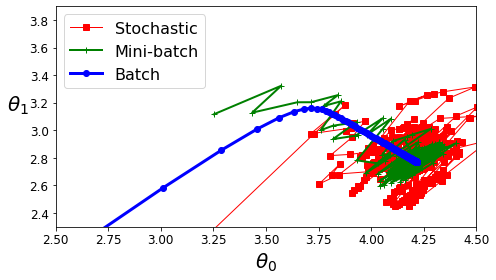

# 3. 다항 회귀
* 다항 회귀(polynomial regression)는 **선형 회귀**를 이용하여 **비선형 데이터**를 학습하는 기법

* 기본 아이디어
  * **특성 조합**을 이용
  * 추가되는 특성은 기존의 특성값들의 **거듭제곱**, 특성값들 사이의 **곱** 등으로 이루어짐
  * 즉, 특성 변수들의 **다항을 조합 특성**으로 추가

#### **`PolynomialFeatures` 변환기**
* 주어진 특성들의 **거듭제곱을 특성으로 추가**하여 선형 회귀를 적용하면 위 경우와 같은 문제 해결이 가능

* 사이킷런의 **`PolynomialFeatures`** 변환기: 주어진 특성들의 **거듭제곱**과 특성들 사이의 **곱셈**을 실행하여 **특성을 추가**하는 기능을 제공

* **`degree=d`**: $d\ge 2$에 대해 `PolynomialFeatures` 변환기가 하는 일은 아래와 같음
  * $x_1, \dots, x_n$가 n개의 특성 변수라 하면
    * 아래 다항식에 사용되는 모든 항들에 대한 **특성 변수가 추가**됨
$$\sum_{k=2}^d(x_1 + \cdots + x_n)^k$$

    * $n, d \ge 2$인 경우 정확히 **다음 숫자 만큼**의 특성이 추가됨 => **높은 차수를 선택하면 매우 많은 수의 특성이 추가됨**에 주의
$$\frac{(n+d)!}{n! \, d!}-n$$

  * 예를 들어 $n=2, d=3$인 경우 $(x_1+x_2)^2 + (x_1+x_2)^3$ 에 사용된 아래 항들에 대한 특성 6개가 추가됨
$$x_1^2,\,\, x_1 x_2,\,\, x_2^2,\,\, x_1^3,\,\, x_1^2 x_2,\,\, x_1 x_2^2,\,\, x_2^3$$

* **`include_bias=False`**: 기본값은 True
  * `include_bias=True`인 경우 편향(bias) 특성이 0번 열에 추가된 후 변환 과정이 실행
  * 하지만 `LinearRegression`과 함께 사용될 경우 자동으로 **0번 열에 1**이 추가
  * 따라서 여기서는 **False**를 사용
  * **다른 모델**과 함께 사용될 경우는 **True 옵션을 그대로 사용하는 것**을 추천

# 4. 학습 곡선
* 고차 다항 회귀를 적용하면 주어진 데이터에 잘 적응
* 아래 코드는 기본 선형 회귀 모델과 2차, 300차 다항 회귀 모델의 학습 결과를 보여줌 
  * 빨간색, 파란색, 녹색 선은 새로운 데이터에 대한 예측 결과를 각각의 모델에 대한 그래프로 보여줌

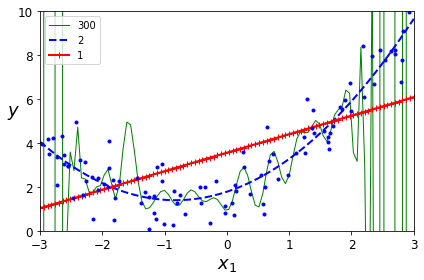

## 4.1 **과소적합, 과대적합**
---
* 기본 선형 회귀의 경우 고차 항을 전혀 사용하지 않으므로 **빨간색 직선**으로 예측
  * **과소적합**: 학습 과정에서 훈련 세트에 제대로 **적응하지 않았음**을 의미

* **과대적합**: 주어진 훈련 세트에 **과하게 적응**함을 의미
  * 과대적합 모델의 알고 있는 데이터에 너무 적응이 되어서 새로운 데이터에 대한 예측을 제대로 하지 못함


#### **훈련 세트, 검증 세트, 테스트 세트의 구분**
* 머신러닝 모델 학습에 사용되는 데이터셋은 역할에 따라 다음 세 종류로 구분
  * **훈련 세트**
    * 모델 훈련 과정에 사용되는 데이터 샘플들의 집합
    * 즉, **비용함수를 계산**하는데 직접 사용되는 데이터 샘플들의 집합
    * 훈련 세트와 테스트 세트로 나뉘어질 때 생성된 **전체 훈련 세트**를 가리키거나, 아니면, 교차 검증 등에서처럼 **반복 학습 과정에서 사용되는 훈련 세트**를 가리키기도 함
  
  * **검증 세트**
    * 전체 훈련 세트를 여러 개의 세트로 나뉘어진 부분 집합 중의 하나
    * 다른 훈련 세트를 통해 **학습된 모델의 성능을 측정**하기 위해 사용되는 데이터 샘플 집합
    * 다음 번 학습 과정에서는 **훈련 세트에 포함될 수도 있는** 전체 훈련 세트의 일부

  * **테스트 세트**
    * 처음부터 전체 훈련 세트로부터 분리된 데이터셋
    * 모델 **학습** 과정에 관여 X
    * **검증** 과정에도 관여 X
    * 모든 훈련이 끝난 후에 구현된 모델의 **실전 성능**을 테스트 하기위해 사용되는 데이터셋을 가리킴


## 4.2 **학습 곡선**
---
* 학습된 모델의 과소적합 또는 과대적합 여부 확인 방법
  *  **교차 검증**을 사용
    * 훈련 세트에 대한 **검증은 우수하지만 교차 검증 점수가 낮으면** 모델이 **과대적합**
    * 훈련 세트와 교차 검증 점수 **모두 낮으면** 모델이 **과소적합**

  * **학습 곡선** 분석
    * 학습 곡선: 훈련 세트와 검증 세트에 대한 모델 성능을 **모델이 학습하는 과정을 반복하여 추적한 결과**를 그래프로 그린 결과

#### **과소적합** 모델의 학습 곡선 특징
* 기본 선형 회귀 모델을 대상으로 하면 과소적합이 발생하며, 과소적합에 대한 학습 곡선은 기본적으로 아래와 같은 특성을 보임
  * 훈련 데이터에 대한 성능
    * 훈련 세트가 커지면서 **RMSE(평균 제곱근 오차)가 커짐**
      * 2차 다항 회귀가 아닌 **기본 선형** 회귀이기 때문에 어쩔 수 없음
    * 훈련 세트가 어느 정도 커지면 **더 이상 RMSE가 변하지 않음**
  * 검증 데이터에 대한 성능
    * **검증 세트**에 대한 성능이 **훈련 세트**에 대한 성능과 거의 **비슷**해짐